In [2]:
import re

# Clean text
def clean_text(text):
    # Remove patterns at beginning of text such as "WASHINGTON (Reuters) -"
    # cleaned_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    # cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    cleaned_text = re.sub(r"^\S+(?:\s+\S+)*\s*\([^)]+\)\s*-", '', text)
    cleaned_text = re.sub(r"\n", "", cleaned_text) # removing \n
    cleaned_text = re.sub(r'\(.*?\)\s*-\s*', '', cleaned_text)
    # cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_text)
    # cleaned_text = re.sub(r',+', ' ', cleaned_text)
    return cleaned_text

In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Combining true and false datasets
true_df = pd.read_csv('True.csv')
false_df = pd.read_csv('Fake.csv')
 
true_df["fake_news_flag"] = 0

true_df['text'] = true_df['text'].apply(clean_text)
false_df["fake_news_flag"] = 1

combined_df = pd.concat([true_df, false_df], ignore_index=True)


In [4]:
combined_df.to_csv('trueandfalsedata.csv', index=False)

In [5]:
# Manually clean
example_text = combined_df['text'].iloc[12300]
example_text = "IADSF DF (Reuters) - Nato"
example_text = "(CNN) - "
cleaned_example = re.sub(r"^\S+(?:\s+\S+)*\s*\([^)]+\)\s*-", '', example_text)
cleaned_example = re.sub(r'\(.*?\)\s*-\s*', '', cleaned_example)
print(f"Original: {example_text}")
print(f"Cleaned: {cleaned_example}")


Original: (CNN) - 
Cleaned: 


In [6]:
# Processing WELFake_Dataset.csv
big_df = pd.read_csv("WELFake_Dataset.csv")
big_df["fake_news_flag"] = big_df["label"]
big_df

,Unnamed: 0,title,text,label,fake_news_flag
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,1
1,1,NaN,Did they post their votes for Hillary already?,1,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,0


In [7]:
big_df.drop(columns=["Unnamed: 0","label"], inplace= True)
big_df = big_df.dropna()
big_df['text'] = big_df['text'].apply(clean_text)
big_df.head()

/var/folders/gb/xncdl8px3cn3zv0m53x6vb6m0000gn/T/ipykernel_14842/4071207628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df['text'] = big_df['text'].apply(clean_text)


,title,text,fake_news_flag
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [8]:

# Dropping columns and adding the processed WELFake_Dataset data
combined_df.drop(columns=['date','subject'], inplace= True)

combined_df = pd.concat([combined_df, big_df], ignore_index=True)

combined_df = shuffle(combined_df, random_state=42)
combined_df.head()
combined_df.tail()



,title,text,fake_news_flag
76820,THIS ONE STATEMENT IS THE KEY TO THE 2016 ELEC...,Listen up people! This is great! Lou Dobbs get...,1
110268,Virginia court rules for Trump in travel ban d...,A U.S. federal judge in Virginia ruled on Frid...,0
103694,Compromises being reached in Iran talks,Washington (CNN) Compromises on some of the cr...,0
860,Republican tax plan would deal financial hit t...,The Republican tax plan unveiled on Thursday ...,0
15795,U.N. refugee commissioner says Australia must ...,The U.N. High Commissioner for Refugees said ...,0


In [9]:
# Saving new full dataset to CSV to easily use later
combined_df.to_csv('fulldata.csv', index=False)

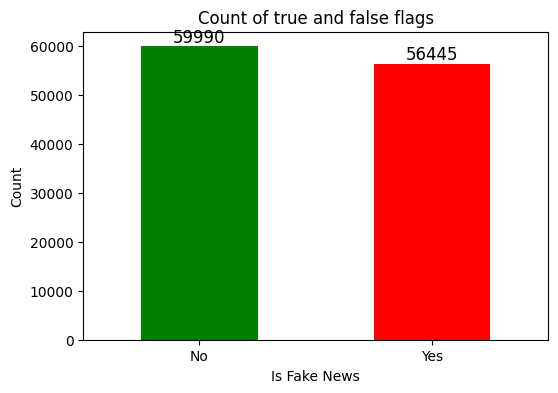

In [10]:
import matplotlib.pyplot as plt


counts = combined_df['fake_news_flag'].value_counts()

plt.figure(figsize=(6, 4))
ax = counts.plot(kind='bar', color=['green', 'red'])

plt.xlabel('Is Fake News')
plt.ylabel('Count')
plt.title('Count of true and false flags')

for idx, value in enumerate(counts):
    ax.text(idx, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)


plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

Create clustering based on topics using embeddings

In [11]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing and vectorizing the text data
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(combined_df['text'])

num_topics = 9  
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(X)

# Top words per topic
terms = vectorizer.get_feature_names_out()
topic_labels = []

for topic_idx, topic in enumerate(nmf_model.components_):
    topic_words = [terms[i] for i in topic.argsort()[:-10 - 1:-1]] 
    print(f"Topic #{topic_idx}: {' '.join(topic_words)}")


topic_label_map = {
    0: 'U.S. Politics',
    1: 'International Affairs',
    2: 'U.S. Politics',
    3: 'International Affairs',
    4: 'U.S. Politics',
    5: 'General News and Announcements',
    6: 'International Affairs',
    7: 'Legal and Political',
    8: 'Social Issue'
}

topic_assignments = nmf_model.transform(X)
dominant_topic = topic_assignments.argmax(axis=1)

combined_df['dominant_topic'] = dominant_topic
combined_df['topic_label'] = combined_df['dominant_topic'].map(topic_label_map)


print(combined_df[['title', 'topic_label']])

combined_df

Topic #0: trump donald president campaign said white republican twitter presidential image
Topic #1: said government state minister military islamic police united forces security
Topic #2: clinton hillary campaign fbi emails sanders email election democratic presidential
Topic #3: russia russian putin intelligence moscow syria fbi comey investigation committee
Topic #4: tax republican senate republicans house party percent said vote democrats
Topic #5: mr ms said mrs new york company times years like
Topic #6: korea north china nuclear korean south missile united chinese sanctions
Topic #7: obama court president administration supreme justice white house judge federal
Topic #8: people like just black police don video twitter com know
                                                    title  \
103573  N.J. Democrats divided on renewing 'Bridgegate...   
49580   NO KIDDING! HERE’S WHY HILLARY SUPPORTERS Will...   
78956           Iraqi Army: US Hindering Advance on Mosul   
51231   Brit

,title,text,fake_news_flag,dominant_topic,topic_label
103573,N.J. Democrats divided on renewing 'Bridgegate...,A day after two former allies of New Jersey G...,0,1,International Affairs
49580,NO KIDDING! HERE’S WHY HILLARY SUPPORTERS Will...,Wow! The Dems are so out of touch,1,0,U.S. Politics
78956,Iraqi Army: US Hindering Advance on Mosul,The Iraqi army blasted the US for troubling i...,1,1,International Affairs
51231,Britain frustrated by slow pace of Brexit talk...,Prime Minister Theresa May s top ministers ar...,0,1,International Affairs
101480,Israeli Trump supporters open campaign office ...,Israeli supporters of U.S. Republican preside...,0,1,International Affairs
...,...,...,...,...,...
76820,THIS ONE STATEMENT IS THE KEY TO THE 2016 ELEC...,Listen up people! This is great! Lou Dobbs get...,1,8,Social Issue
110268,Virginia court rules for Trump in travel ban d...,A U.S. federal judge in Virginia ruled on Frid...,0,7,Legal and Political
103694,Compromises being reached in Iran talks,Washington (CNN) Compromises on some of the cr...,0,1,International Affairs
860,Republican tax plan would deal financial hit t...,The Republican tax plan unveiled on Thursday ...,0,4,U.S. Politics


In [12]:

combined_df.to_csv('labeled_fulldata.csv', index=False)
combined_df

,title,text,fake_news_flag,dominant_topic,topic_label
103573,N.J. Democrats divided on renewing 'Bridgegate...,A day after two former allies of New Jersey G...,0,1,International Affairs
49580,NO KIDDING! HERE’S WHY HILLARY SUPPORTERS Will...,Wow! The Dems are so out of touch,1,0,U.S. Politics
78956,Iraqi Army: US Hindering Advance on Mosul,The Iraqi army blasted the US for troubling i...,1,1,International Affairs
51231,Britain frustrated by slow pace of Brexit talk...,Prime Minister Theresa May s top ministers ar...,0,1,International Affairs
101480,Israeli Trump supporters open campaign office ...,Israeli supporters of U.S. Republican preside...,0,1,International Affairs
...,...,...,...,...,...
76820,THIS ONE STATEMENT IS THE KEY TO THE 2016 ELEC...,Listen up people! This is great! Lou Dobbs get...,1,8,Social Issue
110268,Virginia court rules for Trump in travel ban d...,A U.S. federal judge in Virginia ruled on Frid...,0,7,Legal and Political
103694,Compromises being reached in Iran talks,Washington (CNN) Compromises on some of the cr...,0,1,International Affairs
860,Republican tax plan would deal financial hit t...,The Republican tax plan unveiled on Thursday ...,0,4,U.S. Politics


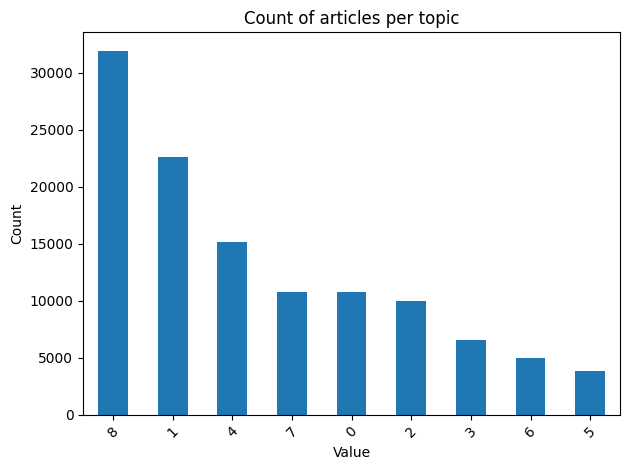

In [13]:
value_counts = combined_df['dominant_topic'].value_counts()

# Plot
value_counts.plot(kind='bar')
plt.title('Count of articles per topic')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()